# Homework 2 - Kernel PCA

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import normalize, PCA, MDS, gaussian_kernel
from sklearn.linear_model import LogisticRegression
from scipy.spatial import distance_matrix

In [2]:
data=np.genfromtxt("data/data_kPCA.txt", delimiter=' ', dtype='float')
labels=np.genfromtxt("data/labels_kPCA.txt", dtype='int')
data=normalize(data)

In [3]:
N=10000
train_size=9000
test_size=1000

In [4]:
shuffled_indices=np.random.permutation(N)
data=data[shuffled_indices]
labels=labels[shuffled_indices]

In [5]:
train_data=data[:train_size]
train_labels=labels[:train_size]
test_data=data[-test_size:]
test_labels=labels[-test_size:]

In [6]:
#PCA
train_y, eigenvalues, _ =PCA(train_data, 2)

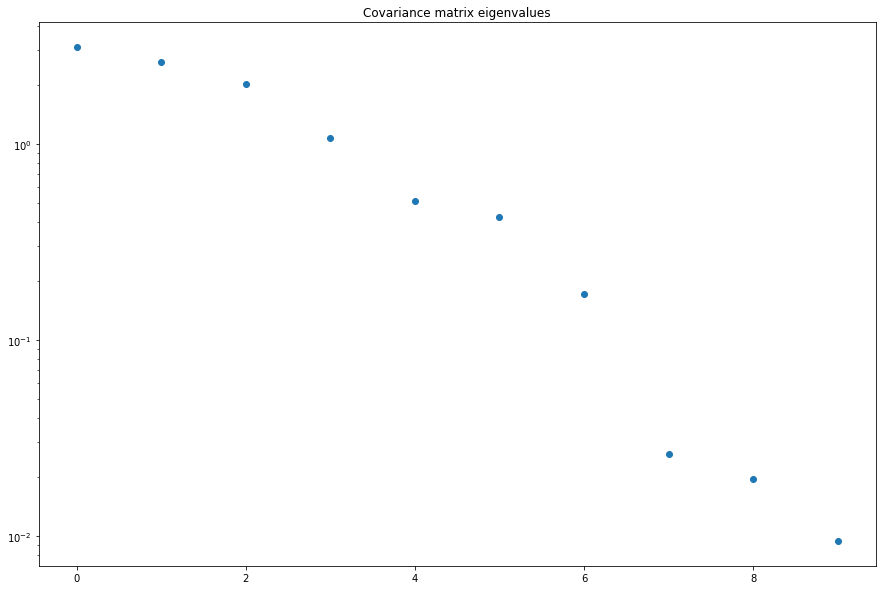

In [7]:
plt.figure(figsize=(15,10))
plt.title("Covariance matrix eigenvalues")
plt.semilogy(eigenvalues, 'o')

<AxesSubplot:title={'center':'Projection on PC1 and PC2'}>

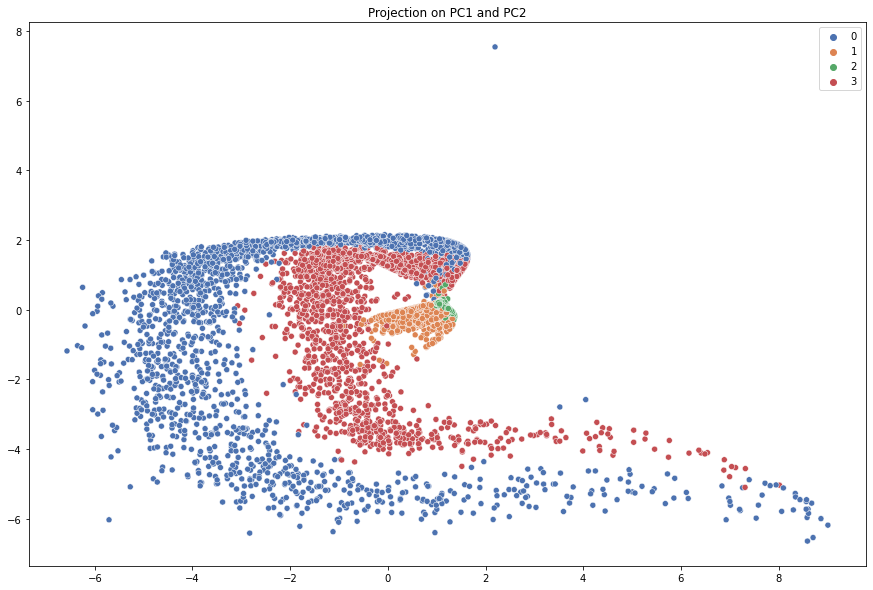

In [8]:
plt.figure(figsize=(15,10))
plt.title("Projection on PC1 and PC2")
sns.scatterplot(x=train_y[:,0], y=train_y[:,1], hue=train_labels, palette="deep")

In [9]:
for d in range(10):
    train_y, _, A=PCA(train_data, d+1)
    clf=LogisticRegression(multi_class='multinomial', max_iter=1000).fit(train_y, train_labels)
    test_y=test_data@A
    accuracy=np.sum(np.equal(clf.predict(test_y), test_labels))/test_size
    print("d: ", d+1, " Accuracy: ", accuracy)

d:  1  Accuracy:  0.642
d:  2  Accuracy:  0.662
d:  3  Accuracy:  0.85
d:  4  Accuracy:  0.924
d:  5  Accuracy:  0.933
d:  6  Accuracy:  0.94
d:  7  Accuracy:  0.943
d:  8  Accuracy:  0.958
d:  9  Accuracy:  0.958
d:  10  Accuracy:  0.961


In [10]:
dist=np.sort(distance_matrix(train_data, train_data, p=2))
fifth_neighbor=dist[:,5]
width=np.mean(fifth_neighbor)

In [12]:
K=np.zeros((N,N), dtype='float')
for i in range(train_size):
    for j in range(train_size):
        K[i,j]=gaussian_kernel(train_data[i], train_data[j], width)

In [13]:
#PCA THROUGH MDS

y, eigvals=MDS(K[:train_size, :train_size], 2)

/Users/lorenzo/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<AxesSubplot:title={'center':'Projection on PC1 and PC2'}>

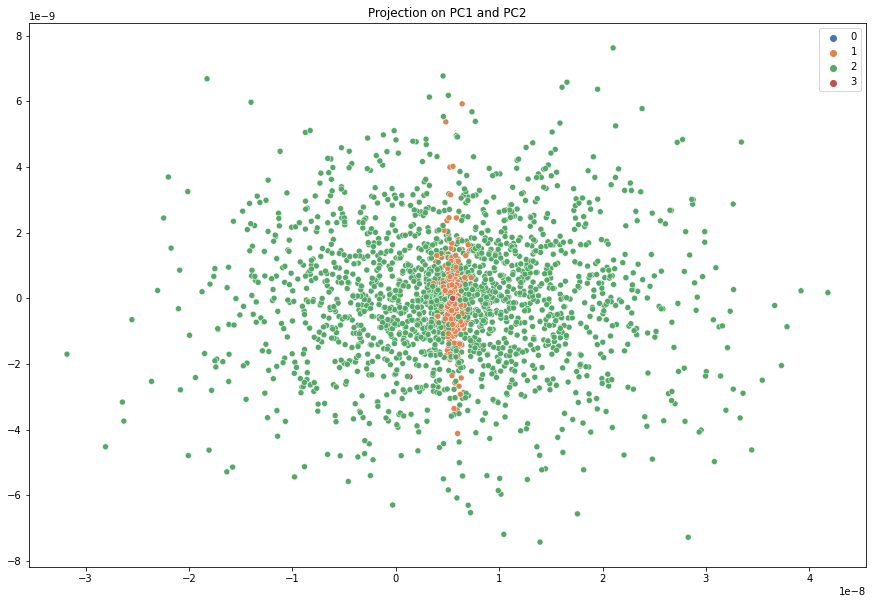

In [16]:
plt.figure(figsize=(15,10))
plt.title("Projection on PC1 and PC2")
sns.scatterplot(x=y[:,0], y=y[:,1], hue=train_labels, palette="deep")